In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Loading the Data

In [25]:
plot_summaries_path = '../MovieSummaries/plot_summaries.txt'
movie_metadata_path = '../MovieSummaries/movie.metadata.tsv'
character_metadata_path = '../MovieSummaries/character.metadata.tsv'

plot_summaries = pd.read_csv(plot_summaries_path, sep='\t', header=None, names=['Wikipedia_ID', 'Plot_Summary'])

# Load movie metadata
movie_metadata = pd.read_csv(movie_metadata_path, sep='\t', header=None, names=['Wikipedia_ID', 'Freebase_ID', 'Movie_Name', 'Release_Date', 'Box_Office_Revenue', 'Runtime', 'Languages', 'Countries', 'Genres'])

# Load character metadata
character_metadata = pd.read_csv(character_metadata_path, sep='\t', header=None, names=['Wikipedia_ID', 'Freebase_ID', 'Release_Date', 'Character_Name', 'Actor_Birth_Date', 'Actor_Gender', 'Actor_Height', 'Actor_Ethnicity', 'Actor_Name', 'Actor_Age', 'Character_Actor_Freebase_ID', 'Character_Freebase_ID', 'Actor_Freebase_ID'])


In [26]:
print("=====PLOT SUMMARIES=====")
display(plot_summaries.shape, plot_summaries.head(2))
print("=====MOVIE METADATA=====")
display(movie_metadata.shape, movie_metadata.head(2))
print("=====CHAR. METADATA=====")
display(character_metadata.shape,character_metadata.head(2))

=====PLOT SUMMARIES=====


(42303, 2)

,Wikipedia_ID,Plot_Summary
0,23890098,"Shlykov, a hard-working taxi driver and Lyosha..."
1,31186339,The nation of Panem consists of a wealthy Capi...


=====MOVIE METADATA=====


(81741, 9)

,Wikipedia_ID,Freebase_ID,Movie_Name,Release_Date,Box_Office_Revenue,Runtime,Languages,Countries,Genres
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science..."
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp..."


=====CHAR. METADATA=====


(450669, 13)

,Wikipedia_ID,Freebase_ID,Release_Date,Character_Name,Actor_Birth_Date,Actor_Gender,Actor_Height,Actor_Ethnicity,Actor_Name,Actor_Age,Character_Actor_Freebase_ID,Character_Freebase_ID,Actor_Freebase_ID
0,975900,/m/03vyhn,2001-08-24,Akooshay,1958-08-26,F,1.62,NaN,Wanda De Jesus,42.0,/m/0bgchxw,/m/0bgcj3x,/m/03wcfv7
1,975900,/m/03vyhn,2001-08-24,Lieutenant Melanie Ballard,1974-08-15,F,1.78,/m/044038p,Natasha Henstridge,27.0,/m/0jys3m,/m/0bgchn4,/m/0346l4


In [27]:
full_movie_metadata = pd.read_csv("data/Utils/merged_movie_metadata.csv")
print("=====MERGED MOVIE DATA=====")
display(full_movie_metadata.shape, full_movie_metadata.head(2))

=====MERGED MOVIE DATA=====


(13786, 33)

,Wikipedia_ID,Movie_Name,Release_Date,Box_Office_Revenue,Runtime,Languages,Countries,Genres,Continents,Year,...,Production,Website,Response,totalSeasons,Oscar,Nomination_Awards,Win_Awards,Internet_Movie_Database_Rating,Rotten_Tomatoes_Rating,Metacritic_Rating
0,13696889,The Gangsters,1913-05-29,NaN,35.0,"['Silent film', 'English Language']",['United States of America'],"['Short Film', 'Silent film', 'Indie', 'Black-...",['America'],1957,...,NaN,NaN,True,NaN,0,0,0,5.9,NaN,NaN
1,10408933,Alexander's Ragtime Band,1938-08-16,3600000.0,106.0,['English Language'],['United States of America'],"['Musical', 'Comedy', 'Black-and-white']",['America'],1938,...,NaN,NaN,True,NaN,1,6,1,6.8,8.3,NaN


In [28]:
print(list(full_movie_metadata.columns))

['Wikipedia_ID', 'Movie_Name', 'Release_Date', 'Box_Office_Revenue', 'Runtime', 'Languages', 'Countries', 'Genres', 'Continents', 'Year', 'Rated', 'Director', 'Writer', 'Actors', 'Plot', 'Awards', 'Poster', 'Ratings', 'Metascore', 'imdbRating', 'imdbVotes', 'imdbID', 'DVD', 'Production', 'Website', 'Response', 'totalSeasons', 'Oscar', 'Nomination_Awards', 'Win_Awards', 'Internet_Movie_Database_Rating', 'Rotten_Tomatoes_Rating', 'Metacritic_Rating']


# Visualising Data

In [29]:
display(character_metadata['Actor_Ethnicity'].value_counts(dropna = False).head(10).to_frame().style.set_table_attributes('style="display:inline"').set_caption('<b>Actor Ethnicities</b>'))

,count
Actor_Ethnicity,
nan,344611
/m/0dryh9k,16351
/m/0x67,10159
/m/041rx,10121
/m/02w7gg,6165
/m/033tf_,3857
/m/0xnvg,2956
/m/02ctzb,2307
/m/07hwkr,2250


In [30]:
display(character_metadata['Actor_Name'].value_counts(dropna = False).head(10).to_frame().style.set_table_attributes('style="display:inline"').set_caption('<b>Actors</b>'))

,count
Actor_Name,
nan,1228
Mel Blanc,791
Mithun Chakraborty,328
Oliver Hardy,299
Mohanlal,234
Moe Howard,225
Mammootty,225
Dharmendra Deol,219
Larry Fine,219


### This huge proportion of NaN is an issue...

In [32]:
character_metadata__ethnicity_nan = character_metadata[pd.isna(character_metadata['Actor_Ethnicity'])]
display(character_metadata__ethnicity_nan.head(3))

,Wikipedia_ID,Freebase_ID,Release_Date,Character_Name,Actor_Birth_Date,Actor_Gender,Actor_Height,Actor_Ethnicity,Actor_Name,Actor_Age,Character_Actor_Freebase_ID,Character_Freebase_ID,Actor_Freebase_ID
0,975900,/m/03vyhn,2001-08-24,Akooshay,1958-08-26,F,1.62,NaN,Wanda De Jesus,42.0,/m/0bgchxw,/m/0bgcj3x,/m/03wcfv7
3,975900,/m/03vyhn,2001-08-24,Sgt Jericho Butler,1967-09-12,M,1.75,NaN,Jason Statham,33.0,/m/02vchl6,/m/0bgchnq,/m/034hyc
4,975900,/m/03vyhn,2001-08-24,Bashira Kincaid,1977-09-25,F,1.65,NaN,Clea DuVall,23.0,/m/02vbb3r,/m/0bgchp9,/m/01y9xg


In [33]:
gender_count=character_metadata['Actor_Gender'].value_counts(dropna = False)
display(gender_count.head(30).to_frame().style.set_table_attributes('style="display:inline"').set_caption('<b>Actor Gender</b>'))

,count
Actor_Gender,
M,270257
F,134803
nan,45609


In [34]:
character_metadata_gender_nan = character_metadata[pd.isna(character_metadata['Actor_Gender'])]
display(character_metadata_gender_nan.head(3))

,Wikipedia_ID,Freebase_ID,Release_Date,Character_Name,Actor_Birth_Date,Actor_Gender,Actor_Height,Actor_Ethnicity,Actor_Name,Actor_Age,Character_Actor_Freebase_ID,Character_Freebase_ID,Actor_Freebase_ID
51,2238856,/m/06yc6v,2005-01,Sylvie's Dad,NaN,NaN,NaN,NaN,James Kayten,NaN,/m/0g98dw2,/m/0g98dw5,/m/0g98dwd
82,612710,/m/02wjqm,1999-10-01,NaN,NaN,NaN,NaN,NaN,Kimmy Suzuki,NaN,/m/0gdk_8c,NaN,/m/0gdk_8f
83,31983669,/m/0g4_n3m,1931-09-30,"Lelka, aka 'Merizhka'",NaN,NaN,NaN,NaN,Mariya Gonfa,NaN,/m/0g4_nf5,/m/0g4_ncn,/m/0g4_nck


In [35]:
m_count = character_metadata['Actor_Gender'].value_counts().get('M', 0)
f_count = character_metadata['Actor_Gender'].value_counts().get('F', 0)
total_gender_count=character_metadata['Actor_Gender'].count()

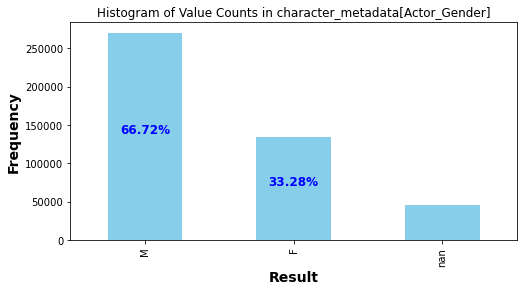

In [36]:
plt.figure(figsize=(8, 4))
ax = gender_count.plot(kind="bar", color="skyblue")
ax.set_title("Histogram of Value Counts in character_metadata[Actor_Gender]")
ax.set_xlabel('Result', fontdict={'fontsize': 14, 'fontweight': 'bold'})
ax.set_ylabel('Frequency', fontdict={'fontsize': 14, 'fontweight': 'bold'})


rects = ax.patches

# Make proportion labels
proportions=[m_count/total_gender_count, f_count/total_gender_count]

for rect, label in zip(rects, proportions):
    ax.text(
        rect.get_x() + rect.get_width() / 2, rect.get_height()/2, f"{label:.2%}", 
        ha="center", va="bottom", fontsize=12, fontweight="bold", color="blue"
    )

plt.show()

In [37]:
full_movie_metadata_char_gender = full_movie_metadata.merge(
    character_metadata[['Wikipedia_ID', 'Actor_Gender', 'Actor_Freebase_ID']],
    on='Wikipedia_ID',
    how='left'
)
full_movie_metadata_char_gender.head(5)

,Wikipedia_ID,Movie_Name,Release_Date,Box_Office_Revenue,Runtime,Languages,Countries,Genres,Continents,Year,...,Response,totalSeasons,Oscar,Nomination_Awards,Win_Awards,Internet_Movie_Database_Rating,Rotten_Tomatoes_Rating,Metacritic_Rating,Actor_Gender,Actor_Freebase_ID
0,13696889,The Gangsters,1913-05-29,NaN,35.0,"['Silent film', 'English Language']",['United States of America'],"['Short Film', 'Silent film', 'Indie', 'Black-...",['America'],1957,...,True,NaN,0,0,0,5.9,NaN,NaN,M,/m/0k57l
1,10408933,Alexander's Ragtime Band,1938-08-16,3600000.0,106.0,['English Language'],['United States of America'],"['Musical', 'Comedy', 'Black-and-white']",['America'],1938,...,True,NaN,1,6,1,6.8,8.3,NaN,F,/m/0pkw7
2,10408933,Alexander's Ragtime Band,1938-08-16,3600000.0,106.0,['English Language'],['United States of America'],"['Musical', 'Comedy', 'Black-and-white']",['America'],1938,...,True,NaN,1,6,1,6.8,8.3,NaN,M,/m/02s58t
3,10408933,Alexander's Ragtime Band,1938-08-16,3600000.0,106.0,['English Language'],['United States of America'],"['Musical', 'Comedy', 'Black-and-white']",['America'],1938,...,True,NaN,1,6,1,6.8,8.3,NaN,F,/m/032xfz
4,10408933,Alexander's Ragtime Band,1938-08-16,3600000.0,106.0,['English Language'],['United States of America'],"['Musical', 'Comedy', 'Black-and-white']",['America'],1938,...,True,NaN,1,6,1,6.8,8.3,NaN,M,/m/02l0xc


In [38]:
# Filter rows where 'Continents' is one of 'America', 'Europe', or 'Both'
full_movie_metadata_char_gender_filtered = full_movie_metadata_char_gender[full_movie_metadata_char_gender['Continents'].apply(lambda x: 'America'in x or 'Europe' in x or 'Both' in x)]

In [39]:
full_movie_metadata_char_gender_american=full_movie_metadata_char_gender[full_movie_metadata_char_gender['Continents'].apply(lambda x: 'America'in x)]
m_count_a = full_movie_metadata_char_gender_american['Actor_Gender'].value_counts().get('M', 0)
f_count_a = full_movie_metadata_char_gender_american['Actor_Gender'].value_counts().get('F', 0)
total_gender_count_a=full_movie_metadata_char_gender_american['Actor_Gender'].count()
gender_count_a=full_movie_metadata_char_gender_american['Actor_Gender'].value_counts(dropna = False)
display(gender_count_a.head(30).to_frame().style.set_table_attributes('style="display:inline"').set_caption('<b>Actor Gender (America)</b>'))

full_movie_metadata_char_gender_europe=full_movie_metadata_char_gender[full_movie_metadata_char_gender['Continents'].apply(lambda x: 'Europe'in x)]
m_count_e = full_movie_metadata_char_gender_europe['Actor_Gender'].value_counts().get('M', 0)
f_count_e = full_movie_metadata_char_gender_europe['Actor_Gender'].value_counts().get('F', 0)
total_gender_count_e=full_movie_metadata_char_gender_europe['Actor_Gender'].count()
gender_count_e=full_movie_metadata_char_gender_europe['Actor_Gender'].value_counts(dropna = False)
display(gender_count_e.head(30).to_frame().style.set_table_attributes('style="display:inline"').set_caption('<b>Actor Gender (Europe)</b>'))

full_movie_metadata_char_gender_both=full_movie_metadata_char_gender[full_movie_metadata_char_gender['Continents'].apply(lambda x: 'Both'in x)]
m_count_b = full_movie_metadata_char_gender_both['Actor_Gender'].value_counts().get('M', 0)
f_count_b = full_movie_metadata_char_gender_both['Actor_Gender'].value_counts().get('F', 0)
total_gender_count_b=full_movie_metadata_char_gender_both['Actor_Gender'].count()
gender_count_b=full_movie_metadata_char_gender_both['Actor_Gender'].value_counts(dropna = False)
display(gender_count_b.head(30).to_frame().style.set_table_attributes('style="display:inline"').set_caption('<b>Actor Gender (Both)</b>'))

,count
Actor_Gender,
M,52302
F,27092
nan,6978


,count
Actor_Gender,
M,11525
F,6013
nan,3336


,count
Actor_Gender,
M,6004
F,3374
nan,709


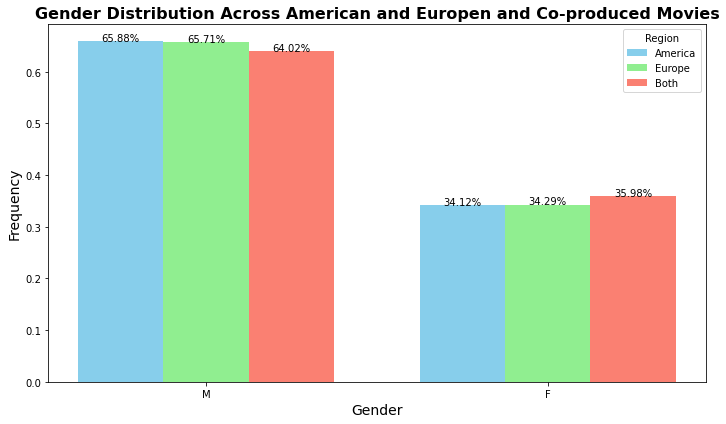

In [ ]:
# Data for the plots
categories = ['M', 'F']
bar_width = 0.25
x_positions = np.arange(len(categories))  # Base positions for the bars

# Create the bar positions
american_positions = x_positions
european_positions = x_positions + bar_width
both_positions = x_positions + 2 * bar_width

# Plot the bars
plt.figure(figsize=(10, 6))

# American movies
plt.bar(american_positions, [m_count_a/total_gender_count_a, f_count_a/total_gender_count_a], width=bar_width, label='America', color='skyblue')

# European movies
plt.bar(european_positions, [m_count_e/total_gender_count_e, f_count_e/total_gender_count_e], width=bar_width, label='Europe', color='lightgreen')

# Both
plt.bar(both_positions, [m_count_b/total_gender_count_b, f_count_b/total_gender_count_b], width=bar_width, label='Both', color='salmon')

# Add labels for each bar
for x, y, proportion in zip(american_positions, [m_count_a/total_gender_count_a, f_count_a/total_gender_count_a], [m_count_a/total_gender_count_a, f_count_a/total_gender_count_a]):
    plt.text(x, y, f"{proportion:.2%}", ha="center", fontsize=10)

for x, y, proportion in zip(european_positions, [m_count_e/total_gender_count_e, f_count_e/total_gender_count_e], [m_count_e/total_gender_count_e, f_count_e/total_gender_count_e]):
    plt.text(x, y, f"{proportion:.2%}", ha="center", fontsize=10)

for x, y, proportion in zip(both_positions, [m_count_b/total_gender_count_b, f_count_b/total_gender_count_b], [m_count_b/total_gender_count_b, f_count_b/total_gender_count_b]):
    plt.text(x, y, f"{proportion:.2%}", ha="center", fontsize=10)

# Customize the plot
plt.title("Gender Distribution Across American and Europen and Co-produced Movies", fontsize=16, fontweight="bold")
plt.xlabel("Gender", fontsize=14)
plt.ylabel("Proportion", fontsize=14)
plt.xticks(x_positions + bar_width, categories)  # Center the group labels
plt.legend(title="Region")
plt.tight_layout()

# Show the plot
plt.show()

In [41]:
ethnicity_map=pd.read_csv("data/ethnicity_mappings.csv")
# Add a leading slash to Freebase_ID in ethnicity_map
ethnicity_map['freebase_id'] = ethnicity_map['freebase_id'].apply(lambda x: f'/{x}' if not x.startswith('/') else x)
ethnicity_map.head(5)


,freebase_id,ethnicity
0,/m/0x67,African Americans
1,/m/064b9n,Omaha Tribe of Nebraska
2,/m/041rx,Jewish people
3,/m/033tf_,Irish Americans
4,/m/04gfy7,Indian Americans


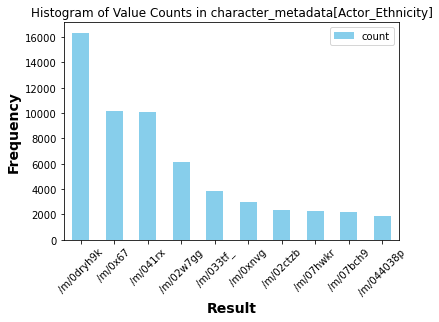

In [42]:
ethnicity_count=character_metadata['Actor_Ethnicity'].value_counts().head(10).to_frame()
# Plot the histogram
ethnicity_count.plot(kind='bar', color='skyblue')
plt.title('Histogram of Value Counts in character_metadata[Actor_Ethnicity]')
plt.xlabel('Result', fontdict={'fontsize': 14, 'fontweight': 'bold'})
plt.ylabel('Frequency', fontdict={'fontsize': 14, 'fontweight': 'bold'})
plt.xticks(rotation=45)
plt.show()

In [44]:
# Convert the ethnicity_map DataFrame into a dictionary for mapping
ethnicity_dict = ethnicity_map.set_index('freebase_id')['ethnicity'].to_dict()

# Map the Freebase IDs in character_metadata to their ethnicities
character_metadata['Actor_Ethnicity'] = character_metadata['Actor_Ethnicity'].map(ethnicity_dict)


In [45]:
character_metadata.sample(10)

,Wikipedia_ID,Freebase_ID,Release_Date,Character_Name,Actor_Birth_Date,Actor_Gender,Actor_Height,Actor_Ethnicity,Actor_Name,Actor_Age,Character_Actor_Freebase_ID,Character_Freebase_ID,Actor_Freebase_ID
358776,21743705,/m/05mqfdd,2009-02-06,NaN,NaN,M,NaN,NaN,Jon Huertas,NaN,/m/0gh95wg,NaN,/m/07sbt7s
374601,2395072,/m/07927k,2006-08-05,Ishidate,1962-07-14,M,NaN,NaN,Masashi Sugawara,44.0,/m/0knrvr5,/m/0knrvr8,/m/04hmfz
332307,20017674,/m/04yh078,NaN,NaN,1897-06-19,M,1.620,NaN,Moe Howard,NaN,/m/05nv9vd,NaN,/m/02cvp8
413699,3447166,/m/09cxm4,1986-12-19,Crystal,1969-06-28,F,NaN,African Americans,Tichina Arnold,17.0,/m/0k021c,/m/0h302r4,/m/06lb9f
161265,17030766,/m/04163s7,1990-03-04,NaN,NaN,NaN,NaN,NaN,Henry Crowell Jr.,NaN,/m/0gcypbl,NaN,/m/0gcykrm
136642,31305654,/m/0ghgvh0,1940-05-20,NaN,1899-11-11,M,NaN,Irish Americans,Pat O'Brien,NaN,/m/0mzn8m3,NaN,/m/06y9_x
378731,12841133,/m/02x75zk,1914-06-16,The Squire,1861,M,NaN,NaN,James Levering,NaN,/m/0jvk62l,/m/0jvk62p,/m/0jvht3s
436447,35411548,/m/0j9bcpl,2011-05-17,Viktor's Grandmother,NaN,F,NaN,NaN,Katinka Nedyalkova,NaN,/m/0lr2364,/m/0lr2367,/m/0lr236g
450534,23851782,/m/06_vb43,1941-05-03,NaN,1903-04-17,F,NaN,NaN,Betty Jardine,38.0,/m/0gcf1g1,NaN,/m/0clzpp2
242910,675832,/m/032016,1993-06-18,Irene Madigan,1948-02-28,F,1.778,NaN,Mercedes Ruehl,45.0,/m/0cg01bl,/m/0hh6j05,/m/039x4s


<Figure size 1080x432 with 0 Axes>

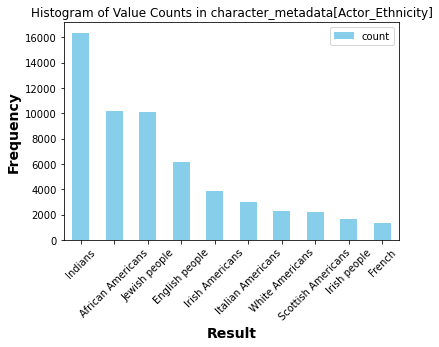

In [46]:
ethnicity_count=character_metadata['Actor_Ethnicity'].value_counts().head(10).to_frame()


# Plot the histogram
plt.figure(figsize=(15, 6))

ethnicity_count.plot(kind='bar', color='skyblue')
plt.title('Histogram of Value Counts in character_metadata[Actor_Ethnicity]')
plt.xlabel('Result', fontdict={'fontsize': 14, 'fontweight': 'bold'})
plt.ylabel('Frequency', fontdict={'fontsize': 14, 'fontweight': 'bold'})
plt.xticks(rotation=45)
plt.show()

In [47]:
full_movie_metadata_char_ethnic = full_movie_metadata.merge(
    character_metadata[['Wikipedia_ID', 'Actor_Ethnicity', 'Actor_Freebase_ID']],
    on='Wikipedia_ID',
    how='left'
)
full_movie_metadata_char_ethnic.head(5)

,Wikipedia_ID,Movie_Name,Release_Date,Box_Office_Revenue,Runtime,Languages,Countries,Genres,Continents,Year,...,Response,totalSeasons,Oscar,Nomination_Awards,Win_Awards,Internet_Movie_Database_Rating,Rotten_Tomatoes_Rating,Metacritic_Rating,Actor_Ethnicity,Actor_Freebase_ID
0,13696889,The Gangsters,1913-05-29,NaN,35.0,"['Silent film', 'English Language']",['United States of America'],"['Short Film', 'Silent film', 'Indie', 'Black-...",['America'],1957,...,True,NaN,0,0,0,5.9,NaN,NaN,Scottish Americans,/m/0k57l
1,10408933,Alexander's Ragtime Band,1938-08-16,3600000.0,106.0,['English Language'],['United States of America'],"['Musical', 'Comedy', 'Black-and-white']",['America'],1938,...,True,NaN,1,6,1,6.8,8.3,NaN,NaN,/m/0pkw7
2,10408933,Alexander's Ragtime Band,1938-08-16,3600000.0,106.0,['English Language'],['United States of America'],"['Musical', 'Comedy', 'Black-and-white']",['America'],1938,...,True,NaN,1,6,1,6.8,8.3,NaN,French Americans,/m/02s58t
3,10408933,Alexander's Ragtime Band,1938-08-16,3600000.0,106.0,['English Language'],['United States of America'],"['Musical', 'Comedy', 'Black-and-white']",['America'],1938,...,True,NaN,1,6,1,6.8,8.3,NaN,Irish Americans,/m/032xfz
4,10408933,Alexander's Ragtime Band,1938-08-16,3600000.0,106.0,['English Language'],['United States of America'],"['Musical', 'Comedy', 'Black-and-white']",['America'],1938,...,True,NaN,1,6,1,6.8,8.3,NaN,NaN,/m/02l0xc


In [48]:
# Filter rows where 'Continents' is one of 'America', 'Europe', or 'Both'
full_movie_metadata_char_ethnic_filtered = full_movie_metadata_char_ethnic[full_movie_metadata_char_ethnic['Continents'].apply(lambda x: 'America'in x or 'Europe' in x or 'Both' in x)]

In [51]:
full_movie_metadata_char_ethnic_american=full_movie_metadata_char_ethnic[full_movie_metadata_char_ethnic['Continents'].apply(lambda x: 'America'in x)]
ethnicity_count_a=full_movie_metadata_char_ethnic_american['Actor_Ethnicity'].value_counts()
display(ethnicity_count_a.head(5).to_frame().style.set_table_attributes('style="display:inline"').set_caption('<b>Actor Ethnicity (America)</b>'))

full_movie_metadata_char_ethnic_europe=full_movie_metadata_char_ethnic[full_movie_metadata_char_ethnic['Continents'].apply(lambda x: 'Europe'in x)]
ethnicity_count_e=full_movie_metadata_char_ethnic_europe['Actor_Ethnicity'].value_counts()
display(ethnicity_count_e.head(5).to_frame().style.set_table_attributes('style="display:inline"').set_caption('<b>Actor Ethnicity (Europe)</b>'))

full_movie_metadata_char_ethnic_both=full_movie_metadata_char_ethnic[full_movie_metadata_char_ethnic['Continents'].apply(lambda x: 'Both'in x)]
ethnicity_count_b=full_movie_metadata_char_ethnic_both['Actor_Ethnicity'].value_counts()
display(ethnicity_count_b.head(5).to_frame().style.set_table_attributes('style="display:inline"').set_caption('<b>Actor Ethnicity (Both)</b>'))

,count
Actor_Ethnicity,
Jewish people,4121
African Americans,4088
Irish Americans,1634
Italian Americans,1335
Scottish Americans,1089


,count
Actor_Ethnicity,
English people,829
Jewish people,292
Italians,239
French,205
White British,110


,count
Actor_Ethnicity,
English people,596
Jewish people,408
African Americans,254
Irish Americans,190
Italian Americans,183


In [77]:
#Bar Plot of Frequency of Ethnicities
def plot_ethnicity_bar(data, title, color, figsize=(10, 6)):
    plt.figure(figsize=figsize)
    plt.bar(data.index, data.values, color=color)
    plt.title(title, fontsize=16, fontweight='bold')
    plt.xlabel('Ethnicity', fontsize=14, fontweight='bold')
    plt.ylabel('Frequency', fontsize=14, fontweight='bold')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

#Bar Plot of Percentage of Ethnicities
def plot_ethnicity_prop(data, title, color, figsize=(10, 6)):
    ethnic_proportion= (data / data.sum())*100
    plt.figure(figsize=figsize)
    bars = plt.bar(data.index, ethnic_proportion.values, color=color)
    
    # Add value labels to each bar
    for bar in bars:
        height = bar.get_height()
        plt.text(
            bar.get_x() + bar.get_width() / 2,  # X position
            height,  # Y position (slightly above the bar)
            f'{height:.2f}%',  # Text label (rounded to 1 decimal place)
            ha='center',  # Center align text
            va='bottom',  # Align text at the bottom
            fontsize=10  # Font size
        )

    # Add title and labels
    plt.title(title, fontsize=16, fontweight='bold')
    plt.xlabel('Ethnicity', fontsize=14, fontweight='bold')
    plt.ylabel('Percentage (%)', fontsize=14, fontweight='bold')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

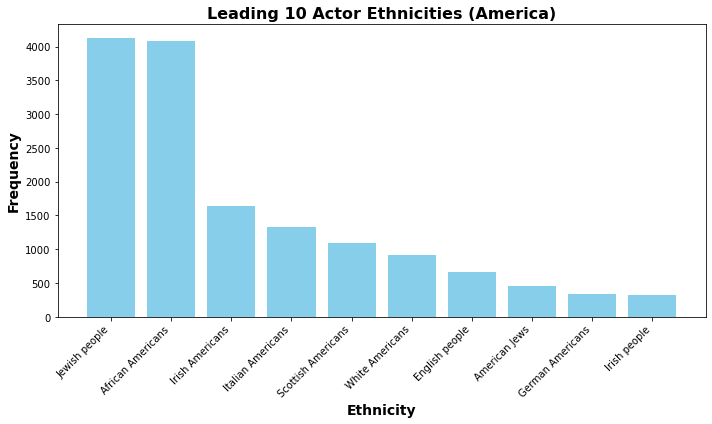

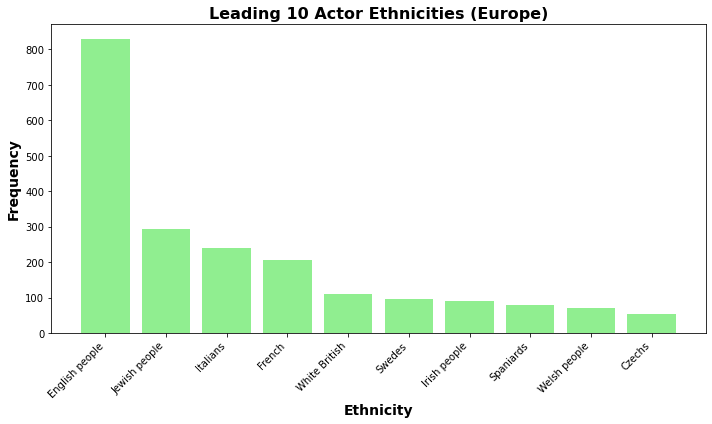

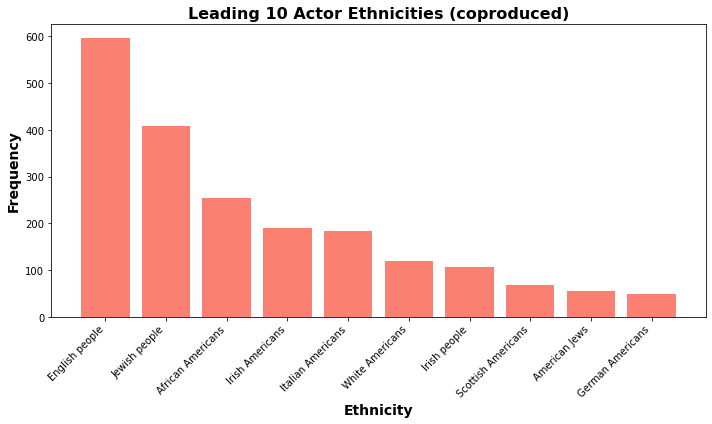

In [78]:
i=10
plot_ethnicity_bar(ethnicity_count_a.head(i),title=f'Leading {i} Actor Ethnicities (America)',color='skyblue')
plot_ethnicity_bar(ethnicity_count_e.head(i),title=f'Leading {i} Actor Ethnicities (Europe)',color='lightgreen')
plot_ethnicity_bar(ethnicity_count_b.head(i),title=f'Leading {i} Actor Ethnicities (coproduced)',color='salmon')

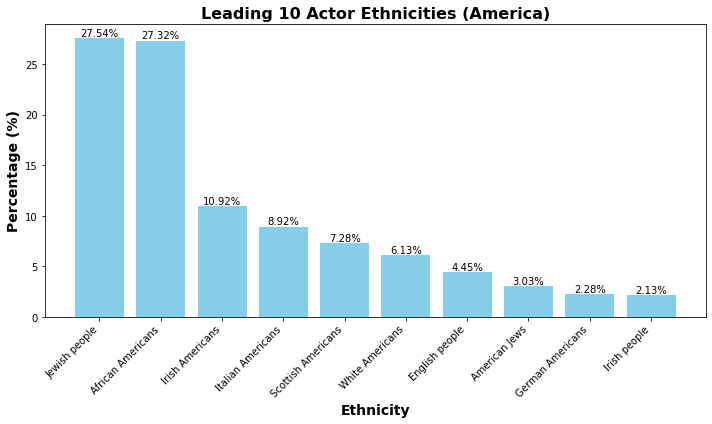

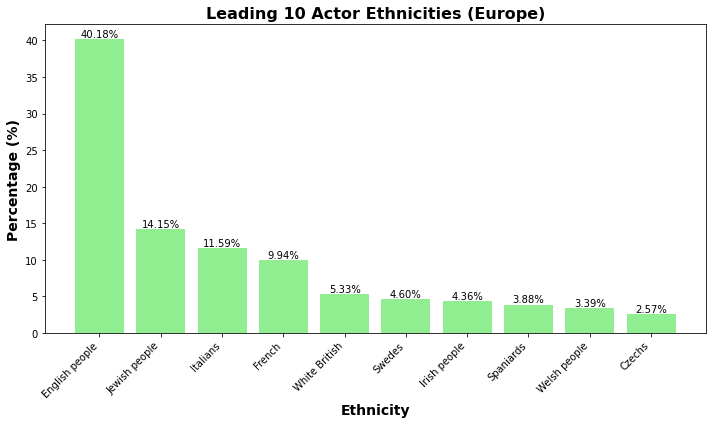

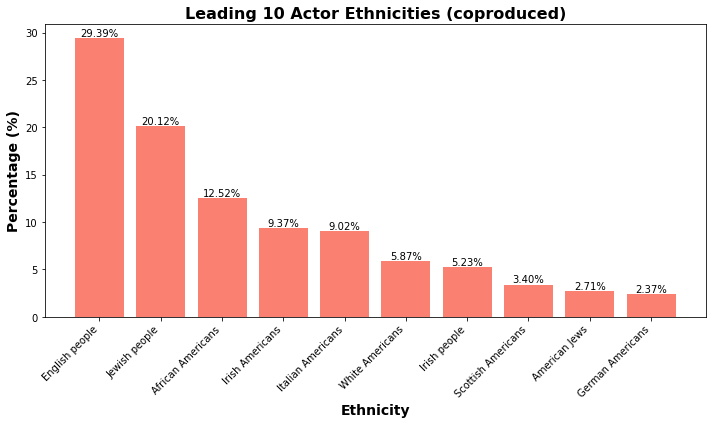

In [79]:
i=10
plot_ethnicity_prop(ethnicity_count_a.head(i),title=f'Leading {i} Actor Ethnicities (America)', color='skyblue')
plot_ethnicity_prop(ethnicity_count_e.head(i), title=f'Leading {i} Actor Ethnicities (Europe)', color='lightgreen')
plot_ethnicity_prop(ethnicity_count_b.head(i), title=f'Leading {i} Actor Ethnicities (coproduced)', color='salmon')